In [496]:
#importing dependencies
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [497]:
#import files
city_path = os.path.join("data/city_data.csv")
ride_path = os.path.join("data/ride_data.csv")

In [498]:
city_df = pd.read_csv(city_path)
ride_df = pd.read_csv(ride_path)

In [499]:
#drop duplicate 'city'
city_df = city_df.drop_duplicates('city', keep = 'first')


In [500]:
merged_df = city_df.merge(ride_df, on = 'city')

In [501]:
#merging data files
combined_data = pd.merge(city_data_pd, ride_data_pd, on="city")
combined_data = combined_data.rename(columns={"city":"City",
                                            "driver_count":"Driver Count",
                                            "type":"Type",
                                            "date":"Date",
                                            "fare":"Fare",
                                            "ride_id":"Ride ID"})
combined_data.head()

,City,Driver Count,Type,Date,Fare,Ride ID
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [502]:
#group by city 
by_city = merged_df.groupby('city')

In [503]:
#average fare by city
avg_fare = by_city.mean()['fare']
avg_fare.head()


city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [504]:
#rides by city
ride_count = by_city['ride_id'].count()
ride_count.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [505]:
#driver in each city
driver_count = by_city.mean()['driver_count']
driver_count.head()


city
Amandaburgh      12.0
Barajasview      26.0
Barronchester    11.0
Bethanyland      22.0
Bradshawfurt      7.0
Name: driver_count, dtype: float64

In [506]:
# put cities into categories
city_type = city_df.set_index('city')['type']
city_type.head()

city
Richardfort     Urban
Williamsstad    Urban
Port Angela     Urban
Rodneyfort      Urban
West Robert     Urban
Name: type, dtype: object

In [507]:
#create df
pyber_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})

pyber_info.head()

,Number of Rides,Average Fare,Number of Drivers,Type of City
Amandaburgh,18,24.641667,12.0,Urban
Barajasview,22,25.332273,26.0,Urban
Barronchester,16,36.422500,11.0,Suburban
Bethanyland,18,32.956111,22.0,Suburban
Bradshawfurt,10,40.064000,7.0,Rural


In [508]:
# seperate city categories
#urban
urban = pyber_info.loc[pyber_info["Type of City"]== "Urban"]

#suburban
suburban = pyber_info.loc[pyber_info["Type of City"]== "Suburban"]

#rural
rural = pyber_info.loc[pyber_info["Type of City"]== "Rural"]

<IPython.core.display.Javascript object>


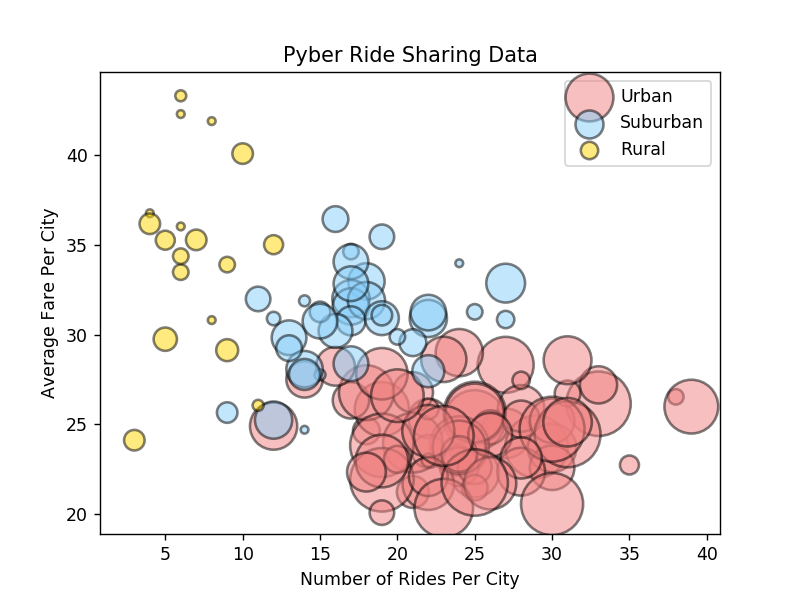

In [509]:
plt.scatter(urban["Number of Rides"], urban["Average Fare"], color = "lightcoral", edgecolors="black",
            s = urban["Number of Drivers"]*20, label = "Urban", alpha = 0.5, linewidth = 1.5)

plt.scatter(suburban["Number of Rides"], suburban["Average Fare"], color = "lightskyblue", edgecolors ="black",
            s = suburban["Number of Drivers"]*20, label = "Suburban", alpha = 0.5, linewidth = 1.5)

plt.scatter(rural["Number of Rides"], rural["Average Fare"], color = "gold", edgecolors = "black",
            s = rural["Number of Drivers"]*20, label = "Rural", alpha = 0.5, linewidth = 1.5)

#label the graph
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Number of Rides Per City")
plt.ylabel("Average Fare Per City")

#create legend
plt.legend(loc= "upper right")

plt.show()

In [510]:
# fares by city type
total_fares = combined_data["Fare"].sum()
urban_fare = combined_data.loc[combined_data["Type"] == "Urban", "Fare"].sum()
rural_fare = combined_data.loc[combined_data["Type"] == "Rural", "Fare"].sum()
suburban_fare = combined_data.loc[combined_data["Type"] == "Suburban", "Fare"].sum()
#change to percentage
urban_fare_p = urban_fare/total_fares
rural_fare_p = rural_fare/total_fares
suburban_fare_p = suburban_fare/total_fares



In [511]:
#create pie chart
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_fare_p, rural_fare_p, suburban_fare_p]
explode = (0.1, 0, 0)  

<IPython.core.display.Javascript object>


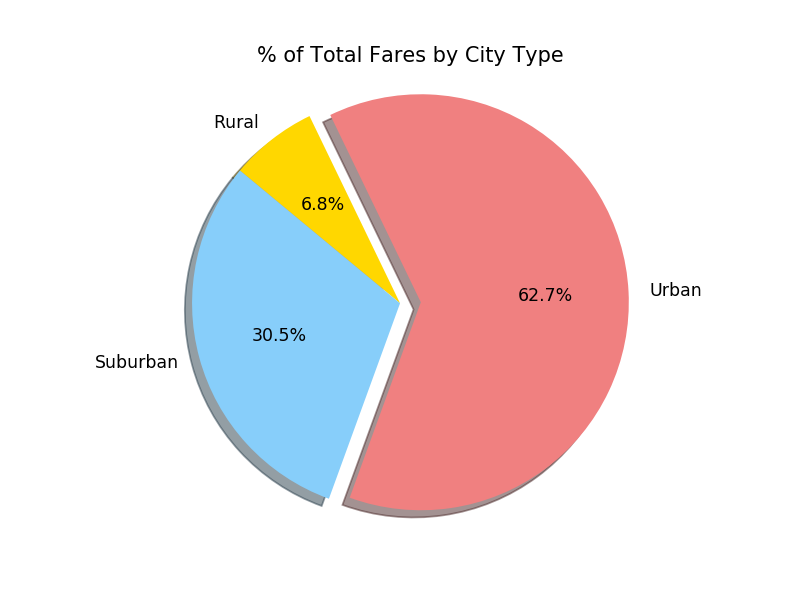

In [512]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
ax1.axis('equal')  
plt.title("% of Total Fares by City Type")
plt.savefig("percent_fare_city_type.png")
plt.show()

In [513]:
#total rides by city type and change to %
total_rides = len(combined_data)
urban_rides = combined_data.loc[combined_data["Type"] == "Urban", "Ride ID"].count()/total_rides
rural_rides = combined_data.loc[combined_data["Type"] == "Rural", "Ride ID"].count()/total_rides
suburban_rides = combined_data.loc[combined_data["Type"] == "Suburban", "Ride ID"].count()/total_rides

In [514]:
#create pie chart
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_rides, rural_rides, suburban_rides]
explode = (0.1, 0, 0)

<IPython.core.display.Javascript object>


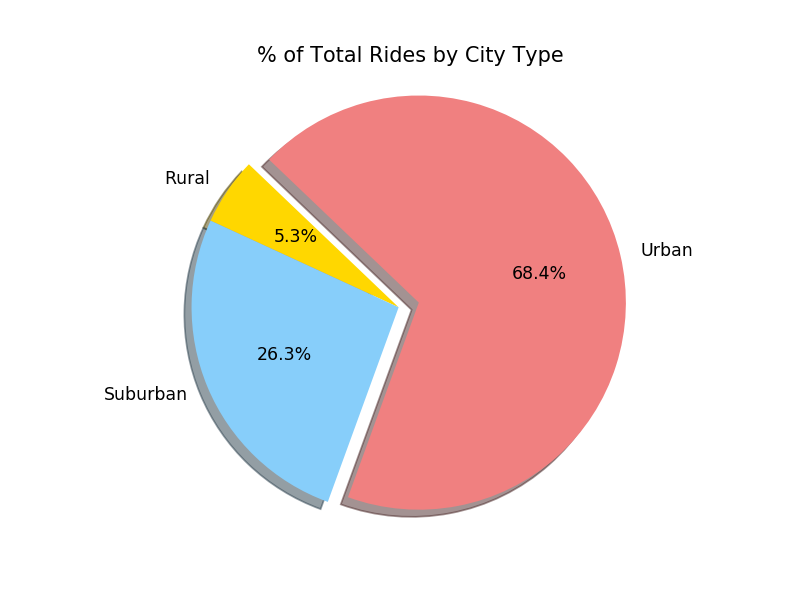

In [515]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
ax1.axis('equal')  
plt.title("% of Total Rides by City Type")
plt.savefig("percent_total_rides_city_type.png")
plt.show()


In [516]:
driver_city = combined_data.groupby(["Type"])["Driver Count"].mean()
urban_drivers = combined_data.loc[combined_data["Type"] == "Urban", "Driver Count"].sum()
rural_drivers = combined_data.loc[combined_data["Type"] == "Rural", "Driver Count"].sum()
suburban_drivers = combined_data.loc[combined_data["Type"] == "Suburban", "Driver Count"].sum()


<IPython.core.display.Javascript object>


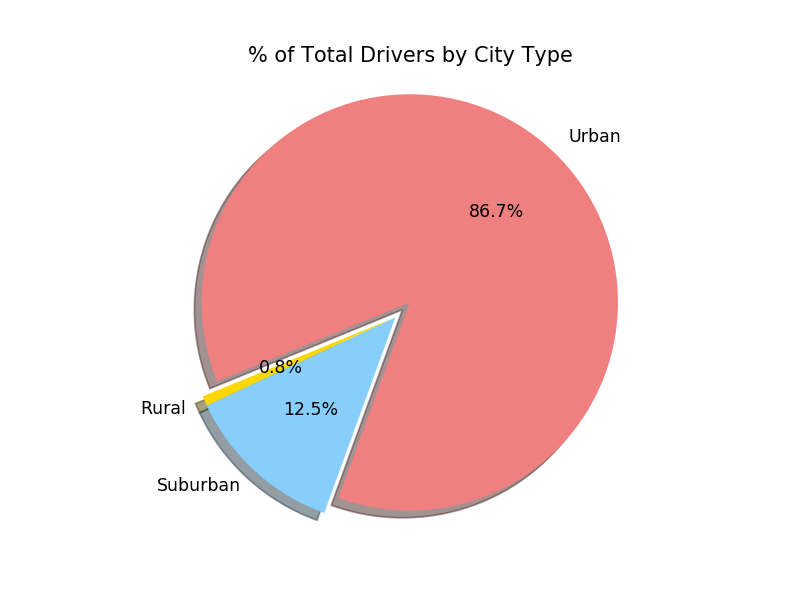

In [517]:
labels = ['Urban', 'Rural', 'Suburban']
sizes = [urban_drivers, rural_drivers, suburban_drivers]
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
  
plt.title("% of Total Drivers by City Type")
ax1.axis('equal')
plt.savefig("percent_total_drivers_city_type.png")
plt.show()


